In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv('wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
plt.rcParams['figure.figsize']=(10,5)

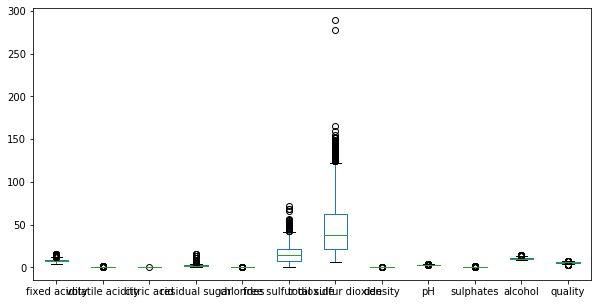

In [6]:
df.plot.box()

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.shape

(1599, 12)

In [9]:
df.shape

(1599, 12)

In [10]:
list=np.arange(0,100)

In [11]:
svm=SVC(kernel='rbf')

In [12]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [13]:
knn=KNeighborsClassifier(25)

In [14]:
x=df.iloc[:,0:-1]

In [15]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [16]:
x.shape

(1599, 11)

In [17]:
y.shape

(1599, 1)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
dtc.fit(xtrain,ytrain)
pred=dtc.predict(xtest)
print('accuracy score is :', accuracy_score(pred,ytest))

accuracy score is : 0.6175


In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
ascore=accuracy_score(pred,ytest)
print(ascore)

0.495


In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
dtc.fit(xtrain,ytrain)
pred=dtc.predict(xtest)
ascore=accuracy_score(pred,ytest)
print(ascore)

0.6175


In [22]:
from sklearn.model_selection import GridSearchCV
crit={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
grid=GridSearchCV(estimator=dtc,param_grid=crit,cv=14,scoring='accuracy')
grid.fit(xtrain,ytrain)

GridSearchCV(cv=14, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [23]:
predict=grid.predict(xtest)

In [24]:
accuracy_score(predict,ytest)

0.6325

In [25]:
grid.best_score_

0.6146788990825688

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.score(xtrain,ytrain)

0.5771476230191827

In [31]:
dtcimp=rfr.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [30]:
rfr=RandomForestClassifier()

In [32]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfr.score(xtrain,ytrain)

0.9841534612176814

In [34]:
pred_rfr=rfr.predict(xtest)

In [35]:
accuracy_score(pred_rfr,ytest)

0.665

In [36]:
imp=rfr.feature_importances_

In [37]:
cols=x.columns

In [38]:
impd=pd.DataFrame({'imp':imp,'cols':cols})

In [39]:
impd.sort_values('imp')

,imp,cols
5,0.067580,free sulfur dioxide
3,0.069143,residual sugar
4,0.071480,chlorides
0,0.074944,fixed acidity
2,0.078544,citric acid
8,0.079220,pH
7,0.088395,density
9,0.101923,sulphates
6,0.103776,total sulfur dioxide
1,0.119361,volatile acidity


In [40]:
cols_drop=['free sulfur dioxide','fixed acidity']

In [41]:
df_drop=df.drop(cols_drop,axis=1)

In [42]:
x=df_drop.iloc[:,0:-1]

In [43]:
y=df_drop.iloc[:,-1].values.reshape(-1,1)

In [44]:
df_drop=np.sqrt(df_drop)

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada=AdaBoostClassifier(base_estimator=rfr)

In [47]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

In [48]:
ada.score(xtrain,ytrain)

1.0

In [49]:
adapred=ada.predict(xtest)

In [50]:
accuracy_score(adapred,ytest)

0.7025

In [51]:
cv=cross_val_score(ada,x,y,cv=15,scoring='accuracy')

In [52]:
cv.mean()

0.5600719448212945

In [53]:
cv.std()

0.057847019850455345

In [55]:
import pickle

In [56]:
wine_model=pickle.dumps(cv)